In [108]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_df(path, encoding="utf-8"):
    loaded_pd = pd.read_csv(path, sep="\t", encoding=encoding)
    pd_name = path.split("/")[-1].split(".")[0]
    return pd_name, loaded_pd

In [3]:
paths_expression = glob.glob("data/expression data/*.txt")

In [4]:
expression_data = []
for path in paths_expression:
    expression_data.append(load_df(path))

In [5]:
paths_other = glob.glob("data/*.txt")
aligner_path = "data\phenotypes_id_aligner.txt"
other_data = []
for path in paths_other:
    if path == aligner_path:
        other_data.append(load_df(path, encoding="latin"))
    else:
        other_data.append(load_df(path))

## We have loaded the dataframes to lists

Each list contains tuples (name, dataframe)
- expression_data: tables with gene expressions
- other_data: all the remaining tables

In [6]:
#(other_data[2][1]).sum(axis=0)

In [7]:
#(other_data[2][1]["BXD8"] == 0).sum()

In [8]:
#[name for name, table in other_data]

In [9]:
#[name for name, table in expression_data]

In [10]:
#[name for name, table in other_data]

In [11]:
#list(other_data[3][1][other_data[3][1]["Category"] == "Immune"].sort_values("Strains", ascending=False)["Phenotype"])

In [12]:
#other_data[3][1][other_data[3][1]["Category"] == "Activity"].sort_values("Strains", ascending=False)

In [13]:
#other_data[3][1][other_data[3][1]["Phenotype"] == "Infectious disease, immune system: H5N1 influenza A virus survival time (10^4 EID-50 of HK213 virus in 30 microliters saline) [days, max to 30]"]

In [14]:
#list(other_data[3][1].sort_values("Strains", ascending=False)[16:]["Phenotype"])

In [119]:
for i in range(len(expression_data)):
    df = expression_data[i][1].set_index('gene').transpose()
    print("Shape: " + repr(df.shape) + " ; Number of NaN values: " + repr(df.isna().sum().sum()))

Shape: (50, 25613) ; Number of NaN values: 0
Shape: (46, 25613) ; Number of NaN values: 0
Shape: (53, 25613) ; Number of NaN values: 0
Shape: (56, 25601) ; Number of NaN values: 0
Shape: (37, 28407) ; Number of NaN values: 0
Shape: (32, 46623) ; Number of NaN values: 2
Shape: (43, 45079) ; Number of NaN values: 0
Shape: (32, 25699) ; Number of NaN values: 0
Shape: (30, 45079) ; Number of NaN values: 0
Shape: (72, 45080) ; Number of NaN values: 0
Shape: (50, 26226) ; Number of NaN values: 0
Shape: (42, 28000) ; Number of NaN values: 0
Shape: (39, 28000) ; Number of NaN values: 0
Shape: (71, 45080) ; Number of NaN values: 0
Shape: (43, 25613) ; Number of NaN values: 0
Shape: (44, 25613) ; Number of NaN values: 0
Shape: (52, 45079) ; Number of NaN values: 0
Shape: (38, 45079) ; Number of NaN values: 0
Shape: (97, 2622) ; Number of NaN values: 154698
Shape: (97, 2622) ; Number of NaN values: 162564
Shape: (41, 26205) ; Number of NaN values: 0
Shape: (40, 26205) ; Number of NaN values: 0
Sh

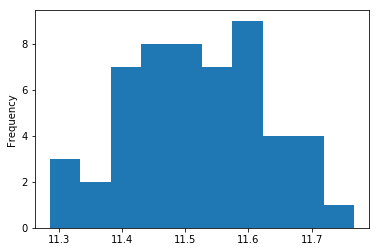

In [52]:
expression_data[2][1].set_index('gene').transpose()['Nmt1_10338077'].plot.hist(bins=10)

In [78]:
sample_df = expression_data[18][1].set_index('gene').transpose()

In [89]:
mice = list(expression_data[18][1].set_index('gene').transpose().index)

In [90]:
mice

['B6D2F1',
 'D2B6F1',
 'C57BL.6J',
 'DBA.2J',
 'BXD1',
 'BXD2',
 'BXD5',
 'BXD6',
 'BXD8',
 'BXD9',
 'BXD11',
 'BXD12',
 'BXD13',
 'BXD14',
 'BXD15',
 'BXD16',
 'BXD18',
 'BXD19',
 'BXD20',
 'BXD21',
 'BXD22',
 'BXD23',
 'BXD24',
 'BXD24a',
 'BXD25',
 'BXD27',
 'BXD28',
 'BXD29',
 'BXD30',
 'BXD31',
 'BXD32',
 'BXD33',
 'BXD34',
 'BXD35',
 'BXD36',
 'BXD37',
 'BXD38',
 'BXD39',
 'BXD40',
 'BXD41',
 'BXD42',
 'BXD43',
 'BXD44',
 'BXD45',
 'BXD48',
 'BXD48a',
 'BXD49',
 'BXD50',
 'BXD51',
 'BXD52',
 'BXD53',
 'BXD54',
 'BXD55',
 'BXD56',
 'BXD59',
 'BXD60',
 'BXD61',
 'BXD62',
 'BXD63',
 'BXD64',
 'BXD65',
 'BXD65a',
 'BXD65b',
 'BXD66',
 'BXD67',
 'BXD68',
 'BXD69',
 'BXD70',
 'BXD71',
 'BXD72',
 'BXD73',
 'BXD73a',
 'BXD73b',
 'BXD74',
 'BXD75',
 'BXD76',
 'BXD77',
 'BXD78',
 'BXD79',
 'BXD81',
 'BXD83',
 'BXD84',
 'BXD85',
 'BXD86',
 'BXD87',
 'BXD88',
 'BXD89',
 'BXD90',
 'BXD91',
 'BXD93',
 'BXD94',
 'BXD95',
 'BXD98',
 'BXD99',
 'BXD100',
 'BXD101',
 'BXD102']

In [130]:
# Compute the total set of mice strains present in the expressions dataframes
mice_set = set()

for i in range(len(expression_data)):
    df = expression_data[i][1].set_index('gene')
    mice_set.update(list(df.columns))

# Compute the total list of mice strains sorted alphabetically
mice_list = sorted(list(mice_set))
print(len(mice_list))

97


In [134]:
# Create a list of dataframes that always contain all mice (with NaN values if the mice are not originally present)
df_list = []

for i in range(len(expression_data)):
    df = expression_data[i][1].set_index('gene')
    missing_mice = mice_set - set(df.columns)
    for mouse in missing_mice:
        df[mouse] = np.NaN
        
    # Order the columns alphabetically
    df = df[mice_list]
    df_list.append(df)

In [138]:
df_list[19]

,B6D2F1,BXD1,BXD100,BXD101,BXD102,BXD11,BXD12,BXD13,BXD14,BXD15,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,C57BL.6J,D2B6F1,DBA.2J
gene,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik_liver_uniqProt,NaN,NaN,0.502314,0.546941,NaN,NaN,NaN,NaN,NaN,NaN,...,0.205222,NaN,NaN,NaN,-0.069169,-0.121523,0.570070,1.367673,NaN,0.913136
0610011F06Rik_liver_uniqProt,NaN,NaN,1.804814,3.598651,NaN,NaN,NaN,NaN,NaN,NaN,...,1.209027,NaN,NaN,NaN,4.160570,1.919162,2.027667,1.467979,NaN,0.330077
0610037L13Rik_liver_uniqProt,NaN,NaN,-0.325848,-0.745736,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.321900,NaN,NaN,NaN,-0.584046,-0.469163,-0.909294,-1.275576,NaN,-0.883653
1110057K04Rik_liver_uniqProt,NaN,NaN,-0.995415,-0.313642,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.029973,NaN,NaN,NaN,0.093517,-0.545597,-0.481686,-0.201350,NaN,-0.368259
1190003J15Rik_liver_uniqProt,NaN,NaN,5.681091,6.199716,NaN,NaN,NaN,NaN,NaN,NaN,...,5.816641,NaN,NaN,NaN,6.192829,3.964421,6.219474,5.382443,NaN,5.153349
1300001I01Rik_liver_uniqProt,NaN,NaN,-8.862063,-6.070117,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.641580,NaN,NaN,NaN,-6.043572,-5.575721,-5.217608,-8.533693,NaN,-6.322678
1300017J02Rik_liver_uniqProt,NaN,NaN,-1.683400,-1.719614,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.734536,NaN,NaN,NaN,-2.814439,-1.562294,-1.628703,-1.249324,NaN,-1.610779
1300018J18Rik_liver_uniqProt,NaN,NaN,-2.218257,-1.960561,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.108660,NaN,NaN,NaN,-1.630170,-2.863365,-2.148904,-1.742215,NaN,-1.648380
1600014C10Rik_liver_uniqProt,NaN,NaN,-0.637276,0.619372,NaN,NaN,NaN,NaN,NaN,NaN,...,2.278463,NaN,NaN,NaN,1.389490,0.538884,-0.365961,-0.671229,NaN,0.798848


(26205, 97)

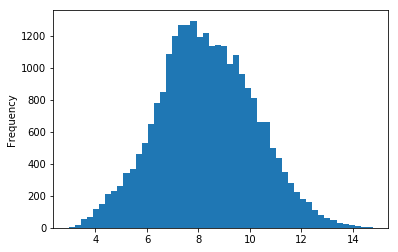

In [33]:
sample_df['BXD99'].plot.hist(bins=50)